## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





[np.float64(30.0), np.float64(47.27272727272727), np.float64(54.285714285714285), np.float64(50.967741935483865), np.float64(48.536585365853654), np.float64(47.84313725490196), np.float64(50.81967213114754), np.float64(49.29577464788733), np.float64(51.48148148148148), np.float64(49.23076923076923), np.float64(49.10891089108911), np.float64(50.54054054054053), np.float64(53.388429752066116), np.float64(51.6030534351145), np.float64(49.9290780141844), np.float64(51.78807947019868), np.float64(49.06832298136646), np.float64(49.707602339181285), np.float64(49.171270718232044), np.float64(51.09947643979058), np.float64(49.900497512437816), np.float64(49.573459715639814), np.float64(50.81447963800905), np.float64(48.35497835497836), np.float64(49.1701244813278), np.float64(48.764940239043824), np.float64(49.08045977011494), np.float64(49.2619926199262), np.float64(48.612099644128115), np.float64(50.48109965635739), np.float64(50.199335548172755), np.float64(49.163987138263664), np.float64(5

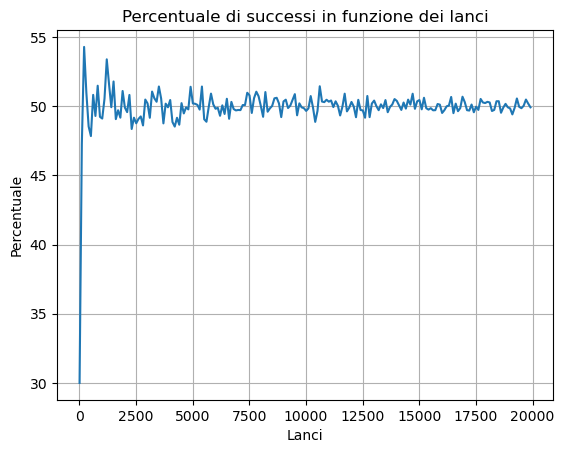

In [3]:
import random
import time
import numpy as np



dim=100
tot = [0] * dim
lanci = [0] * dim
#print(tot)

'''
start_time = time.time()

N=20000
for i in range(0, N):
    a=random.randint(0, 1)
    for j in range(0, dim):
        if j+1>(i+(19990/99-10))/(19990/99):
            lanci[j] += 1
            tot[j] += a
#print(tot)
#print(lanci)
percentuale = []
for i in range(0, dim):
    percentuale.append(tot[i]/lanci[i])
print(percentuale)


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

'''

#start_time = time.time()


def teste(n):
    l = np.array(np.random.randint(0, 2, n))
    freq = np.sum(l) / n
    return freq*100

lanci=np.arange(10, 20000, 100)
percentuale = [teste(i) for i in lanci]
print(percentuale)


#end_time = time.time()
#print(f"Execution time: {end_time - start_time} seconds")

#plot con sulla x lanci e sulla y percentuale
import matplotlib.pyplot as plt
plt.plot(lanci, percentuale)
plt.xlabel('Lanci')
plt.ylabel('Percentuale')
plt.title('Percentuale di successi in funzione dei lanci')
plt.grid()
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [57]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.shape

(714, 12)

In [74]:
df.shape[0]-df.isnull().sum(axis=0)

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       714
dtype: int64

In [70]:
moda = df['Embarked'].mode()
df["Embarked"] = df["Embarked"].fillna(moda[0])

In [73]:
df = df.dropna(subset= "Age")
df.shape

(714, 12)

In [76]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

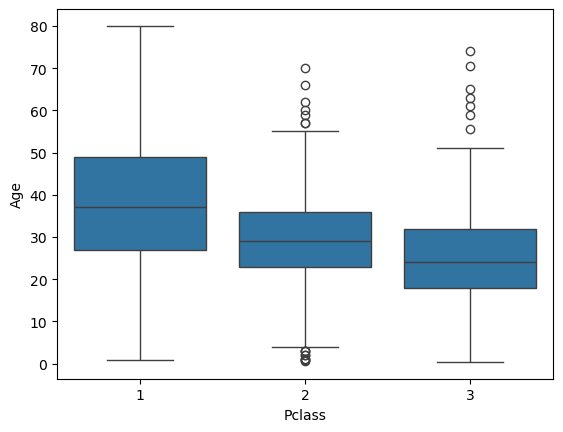

In [82]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

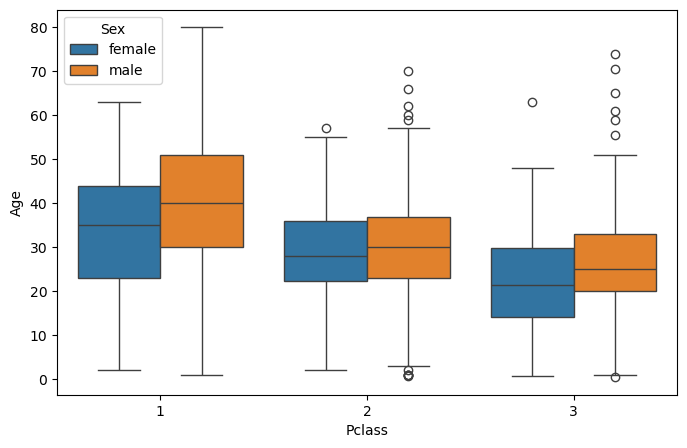

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df) 
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
for i in df['species'].unique():
    print('Quantità di "' + i + '" =', sum(df['species'] == i))
    print('Lunghezza media petali delle "' + i + '" =', df[df['species'] == i]['petal_length'].mean())
    print('Larghezza media petali delle "' + i + '" =', df[df['species'] == i]['petal_width'].mean(),'\n')

Quantità di "setosa" = 50
Lunghezza e media petali delle "setosa" = 1.4620000000000002
Larghezza e media petali delle "setosa" = 0.24599999999999997 

Quantità di "versicolor" = 50
Lunghezza e media petali delle "versicolor" = 4.26
Larghezza e media petali delle "versicolor" = 1.3259999999999998 

Quantità di "virginica" = 50
Lunghezza e media petali delle "virginica" = 5.5520000000000005
Larghezza e media petali delle "virginica" = 2.0260000000000002 



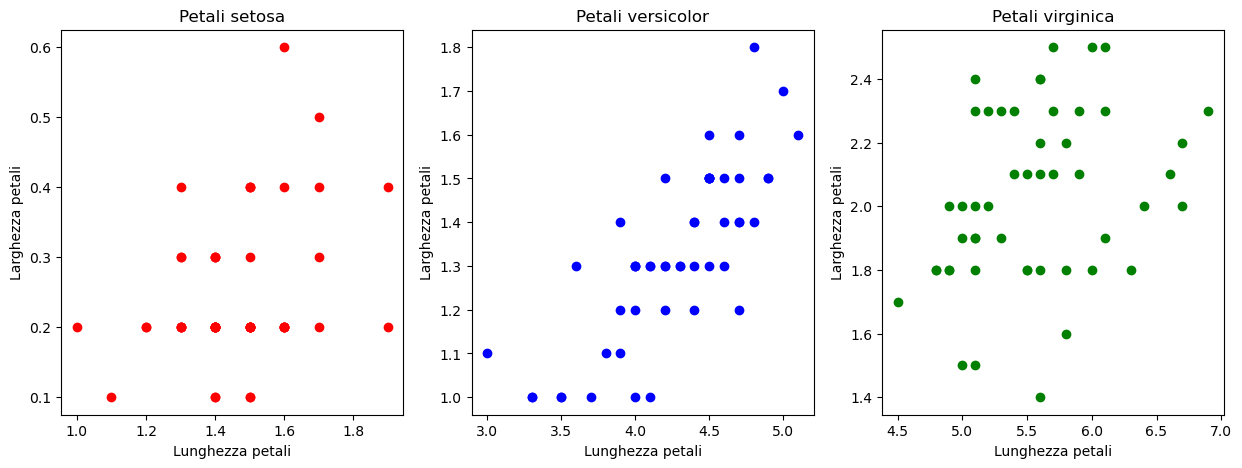

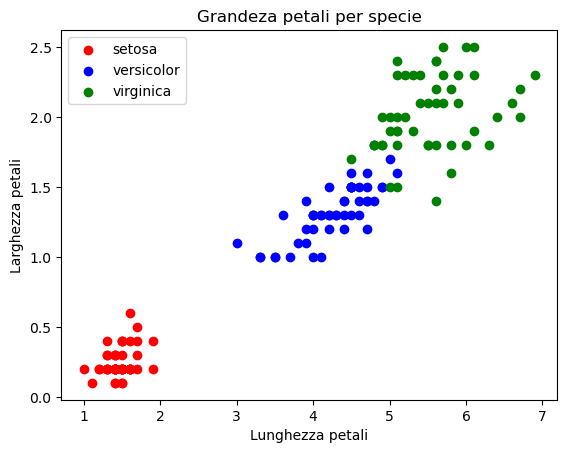

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Petali setosa')
plt.scatter(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['petal_width'], color='red')
plt.xlabel('Lunghezza petali')
plt.ylabel('Larghezza petali')
plt.subplot(1, 3, 2)
plt.title('Petali versicolor')
plt.scatter(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'versicolor']['petal_width'], color='blue')
plt.xlabel('Lunghezza petali')
plt.ylabel('Larghezza petali')
plt.subplot(1, 3, 3)
plt.title('Petali virginica')
plt.scatter(df[df['species'] == 'virginica']['petal_length'], df[df['species'] == 'virginica']['petal_width'], color='green')
plt.xlabel('Lunghezza petali')
plt.ylabel('Larghezza petali')
plt.show()

plt.title('Grandeza petali per specie')
plt.scatter(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['petal_width'], color='red')
plt.xlabel('Lunghezza petali')
plt.ylabel('Larghezza petali')
plt.scatter(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'versicolor']['petal_width'], color='blue')
plt.scatter(df[df['species'] == 'virginica']['petal_length'], df[df['species'] == 'virginica']['petal_width'], color='green')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()


In [25]:
df['petal_area'] = df['petal_length'] * df['petal_width']
for i in df['species'].unique():
    print('Area media petali delle "' + i + '" =', df[df['species'] == i]['petal_area'].mean())


Area media petali delle "setosa" = 0.36560000000000004
Area media petali delle "versicolor" = 5.7204
Area media petali delle "virginica" = 11.296199999999999


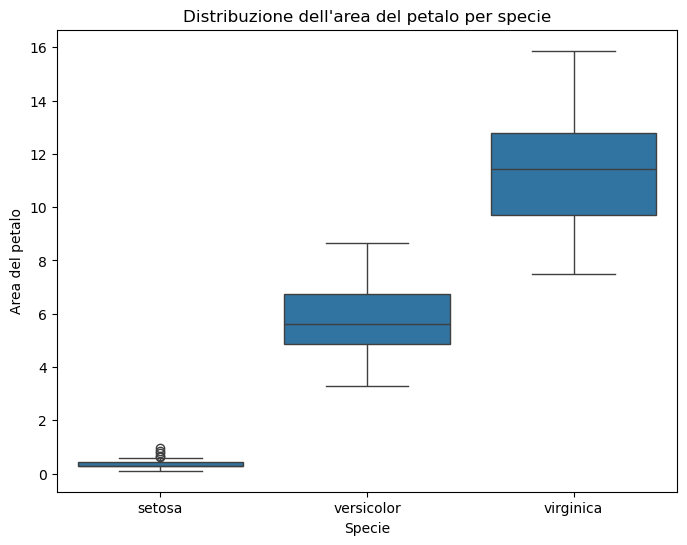

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_area', data=df)
plt.title('Distribuzione dell\'area del petalo per specie')
plt.xlabel('Specie')
plt.ylabel('Area del petalo')
plt.show()